# Content
* [Introduction]
* [Step 1 Initialization]
* [Step 2 Loading Data]
* [Step 3 Data Preparation]
    * [3.1 Prepaid Package]
* [Step 4 Data Quality Enrichment]
    * [4.1 User]
    * [4.2 Call]
    * [4.3 Message]
    * [4.4 Internet]
* [Step 5 Studying Terms and Conditions Related to Prepaid Packages]
* [Step 6 Merging Data]
    * [6.1 Adding Prepaid Information]
    * [6.2 Adding Monthly Revenue]
* [Step 7 Studying User Behavior.]
    * [7.1 Call]
    * [7.2 Message]
    * [7.3 Internet]
    * [7.4 Revenue]
* [Step 8 Hypothesis Testing]
* [Step 9 Conclusion]

# Introduction
This project is about the packages offered by a company called Megaline. There are two packages offered, namely the Ultimate package and the Surf package. Each package has its own advantages according to the users' needs. The user data consists of 500 records collected in 2018. The goals of this project are as follows:
- Analyze user behavior in choosing packages.
- Analyze which package is the most profitable.
- Analyze the revenue of the Ultimate and Surf packages.
- Analyze the revenue from different cities.

# Initialization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

# Loading Data

In [2]:
try:
    users_data = pd.read_csv('D:\datasets\projek_4\megaline_users.csv')
    calls_data = pd.read_csv('D:\datasets\projek_4\megaline_calls.csv')
    messages_data = pd.read_csv('D:\datasets\projek_4\megaline_messages.csv')
    internet_data = pd.read_csv('D:\datasets\projek_4\megaline_internet.csv')
    plans_data = pd.read_csv('D:\datasets\projek_4\megaline_plans.csv')
except:
    users_data = pd.read_csv('/datasets/megaline_users.csv')
    calls_data = pd.read_csv('/datasets/megaline_calls.csv')
    messages_data = pd.read_csv('/datasets/megaline_messages.csv')
    internet_data = pd.read_csv('/datasets/megaline_internet.csv')
    plans_data = pd.read_csv('/datasets/megaline_plans.csv')

# Data Preparetion

## Prepaid Package

In [3]:
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the information above, we can conclude that:
- The data consists of **2** rows and **8** columns.
- There are 2 categories for packages, namely **surf** and **ultimate**.
- There are no data types that are incorrect, and there are no missing values to fill in.

# Data Quality Enrichment

## User

In [5]:
users_data.shape

(500, 8)

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users_data.tail(11)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Dari informasi di atas kita mendapatkan bahwa:
- Data memiliki **8** kolom dan **500** baris.
- Pada kolom `churn_date` hanya ada **34** kolom yang terisi. Ini artinya ada **466** data yang berisi missing values.
- Kolom `churn_date` hanya mengisi nilainya dengan in used. Hal ini dikarenakan pengguna masih menggunakan paket tersebut saat data ini diberikan.
- Pada kolom `reg_date` dan `churn_date` memiliki tipe data yang tidak sesuai yaitu tipe data object. Maka dari itu tipe data akan diubah menjadi tipe data datetime.

### Data Cleansing

In [8]:
column = ['reg_date', 'churn_date']
for col in column:
    users_data[col] = pd.to_datetime(users_data[col], format='%Y-%m-%d')

In [9]:
users_data.head(11)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [10]:
users_data.drop('churn_date', axis='columns', inplace=True)

In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


### Data Quality Enrichment

Menambahkan faktor bulan pada data.

In [12]:
users_data['months'] = users_data['reg_date'].dt.month

## Call

In [13]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
calls_data.shape

(137735, 4)

In [15]:
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [16]:
calls_data['duration'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.588e+01, 3.624e+01,
       3.760e+01])

In [17]:
calls_data[calls_data['duration']<1]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.00
25,1001_13,1001,2018-12-24,0.00
28,1001_23,1001,2018-10-27,0.98
31,1001_30,1001,2018-10-17,0.00
32,1001_31,1001,2018-11-03,0.00
...,...,...,...,...
137720,1499_189,1499,2018-12-27,0.00
137722,1499_191,1499,2018-12-24,0.00
137725,1499_194,1499,2018-10-31,0.00
137727,1499_196,1499,2018-11-22,0.27


In [18]:
len(calls_data[calls_data['duration']<1])/len(calls_data) * 100

23.63887174646967

In [19]:
calls_data.duplicated().sum()

0

From the information above, we can conclude that:
- The dataset consists of **137,735** rows and **4** columns.
- The `call_date` column has an inappropriate data type and will be converted to a datetime data type.
- The `duration` column has a float data type. The values in this column will be rounded up and converted to an integer data type.
- The `duration` column has approximately **23%** of data with a value of 0 minutes. This may be due to unanswered calls.

### Fixing Data

In [20]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d') 

In [21]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [22]:
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

In [23]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


Untuk nilai **0** pada kolom `duration` tidak akan dihapus. Mengingat begitu besar jumlah nilai **0** pada kolom tersebut

In [24]:
calls_data['duration'] = calls_data['duration'].astype('int64')

In [25]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Data Quality Enrichment¶

In [26]:
calls_data['months'] = calls_data['call_date'].dt.month

In [27]:
calls_data

,id,user_id,call_date,duration,months
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


In [28]:
count = calls_data.pivot_table(index='user_id', columns='months',values='duration', aggfunc='count')
count.tail(10)

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1490,NaN,NaN,NaN,NaN,NaN,NaN,16.0,80.0,68.0,43.0,55.0,50.0
1491,NaN,NaN,NaN,8.0,48.0,64.0,60.0,54.0,52.0,75.0,46.0,55.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,54.0,49.0,46.0
1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,66.0,66.0,73.0,65.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,43.0,78.0,67.0,78.0,82.0,72.0
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.0,61.0,65.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,52.0,46.0,39.0,40.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
1498,NaN,37.0,37.0,47.0,35.0,37.0,43.0,44.0,45.0,46.0,41.0,39.0


In [29]:
def calls_month(month, user_id):
    return count[month][user_id]

In [30]:
calls_month(12, 1000)

16.0

In [31]:
calls_data['total_calls_per_month'] = calls_data.apply(lambda x: calls_month(x['months'], x['user_id']), axis=1)

In [32]:
calls_data['total_calls_per_month'] = calls_data['total_calls_per_month'].astype('int64')

In [33]:
calls_data

,id,user_id,call_date,duration,months,total_calls_per_month
0,1000_93,1000,2018-12-27,9,12,16
1,1000_145,1000,2018-12-27,14,12,16
2,1000_247,1000,2018-12-27,15,12,16
3,1000_309,1000,2018-12-28,6,12,16
4,1000_380,1000,2018-12-30,5,12,16
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,45
137731,1499_200,1499,2018-10-20,11,10,53
137732,1499_201,1499,2018-09-21,9,9,41
137733,1499_202,1499,2018-10-10,1,10,53


In [34]:
durations = calls_data.pivot_table(index='user_id', columns='months',values='duration', aggfunc='sum')
durations

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,315.0,393.0,426.0,412.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,386.0,384.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.0
1004,NaN,NaN,NaN,NaN,193.0,275.0,381.0,354.0,301.0,365.0,476.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,610.0,361.0,492.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,414.0,317.0,308.0,294.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0


In [35]:
def total_duration(month, user_id):
    return durations[month][user_id]

In [36]:
durations[12][1000]

124.0

In [37]:
total_duration(12, 1000)

124.0

In [38]:
calls_data['total_durations'] = calls_data.apply(lambda x: total_duration(x['months'], x['user_id']), axis=1)

In [39]:
calls_data['total_durations'] = calls_data['total_durations'].astype('int64')

In [40]:
calls_data

,id,user_id,call_date,duration,months,total_calls_per_month,total_durations
0,1000_93,1000,2018-12-27,9,12,16,124
1,1000_145,1000,2018-12-27,14,12,16,124
2,1000_247,1000,2018-12-27,15,12,16,124
3,1000_309,1000,2018-12-28,6,12,16,124
4,1000_380,1000,2018-12-30,5,12,16,124
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,45,308
137731,1499_200,1499,2018-10-20,11,10,53,385
137732,1499_201,1499,2018-09-21,9,9,41,346
137733,1499_202,1499,2018-10-10,1,10,53,385


## Message

In [41]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
messages_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [43]:
messages_data.duplicated().sum()

0

From the information above, we can conclude that:
- The data consists of **76051** rows and **3** columns. There are no missing values in the data.
- The data type of the `message_date` column is an object, which should be datetime.

### Fixing Data

In [44]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

In [45]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [46]:
messages_data.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [47]:
messages_data[messages_data['user_id']==1001].sort_values(by='message_date')

,id,user_id,message_date
137,1001_267,1001,2018-08-14
128,1001_247,1001,2018-08-15
112,1001_212,1001,2018-08-15
104,1001_192,1001,2018-08-15
54,1001_91,1001,2018-08-15
...,...,...,...
208,1001_403,1001,2018-12-30
179,1001_348,1001,2018-12-30
183,1001_360,1001,2018-12-30
21,1001_21,1001,2018-12-30


### Data Quality Enrichmenct

In [48]:
messages_data['months'] = messages_data['message_date'].dt.month

In [49]:
messages_data.head(10)

,id,user_id,message_date,months
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [50]:
count_messages = messages_data.pivot_table(index='user_id', columns='months', values='message_date', aggfunc='count')
count_messages

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,NaN,NaN,NaN,6.0,45.0,54.0,64.0,50.0,50.0,51.0,46.0,43.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,31.0,37.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,20.0,27.0,21.0,38.0,35.0,33.0


In [51]:
def month_messages(month, user_id):
    return count_messages[month][user_id]

In [52]:
messages_data['messages_permonth'] = messages_data.apply(lambda x: month_messages(x['months'], x['user_id']), axis=1)

In [53]:
messages_data['messages_permonth'] = messages_data['messages_permonth'].astype('int64')

In [54]:
messages_data

,id,user_id,message_date,months,messages_permonth
0,1000_125,1000,2018-12-27,12,11
1,1000_160,1000,2018-12-31,12,11
2,1000_223,1000,2018-12-31,12,11
3,1000_251,1000,2018-12-27,12,11
4,1000_255,1000,2018-12-26,12,11
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,50
76047,1497_536,1497,2018-12-24,12,50
76048,1497_547,1497,2018-12-31,12,50
76049,1497_558,1497,2018-12-24,12,50


## Internet

In [55]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [56]:
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [57]:
internet_data.duplicated().sum()

0

From the information above, we can conclude that:
- There are **104825** rows and **4** columns in the data.
- There are no missing values in the data.
- There is a data type error in the `session_date` column, which will be converted from object to datetime.

### Fixing Data

In [58]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

In [59]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Data Quality Enrichment

In [60]:
internet_data['months'] = internet_data['session_date'].dt.month

In [61]:
internet_data

,id,user_id,session_date,mb_used,months
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [62]:
count_volume = internet_data.pivot_table(index='user_id', columns='months', values='mb_used', aggfunc='sum')
count_volume

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6919.15,13314.82,22330.49,18504.30,19369.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6552.01,19345.08,14396.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27044.14
1004,NaN,NaN,NaN,NaN,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22981.37,26899.41,24912.78,24097.40
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.66,16389.27,14287.36,8547.36,16438.99
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11106.55


In [63]:
def total_volume(month, user_id):
    return count_volume[month][user_id]

In [64]:
internet_data['volume_permonth'] = internet_data.apply(lambda x: total_volume(x['months'], x['user_id']), axis=1)

In [65]:
internet_data

,id,user_id,session_date,mb_used,months,volume_permonth
0,1000_13,1000,2018-12-29,89.86,12,1901.47
1,1000_204,1000,2018-12-31,0.00,12,1901.47
2,1000_379,1000,2018-12-28,660.40,12,1901.47
3,1000_413,1000,2018-12-26,270.99,12,1901.47
4,1000_442,1000,2018-12-27,880.22,12,1901.47
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,19492.43
104821,1499_216,1499,2018-12-30,304.72,12,22059.21
104822,1499_217,1499,2018-09-22,292.75,9,12984.76
104823,1499_218,1499,2018-12-07,0.00,12,22059.21


# Studying the Terms and Conditions Related to Prepaid Packages

In [66]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the above data, it can be concluded that users:
- Users benefit from each type of package they purchase.
- For megabytes (MB), each package is different. However, 1 gigabyte (GB) is equivalent to 1024 MB.
- Each package has additional charges if it exceeds the provided package capacity.
- If the data usage reaches 1025 MB, it will be charged as 2 GB.
- For phone calls and SMS, if you use the phone for only a few seconds, you will be charged 3 cents and 1 cent, respectively.

# Merging Data

In [67]:
new_call_data = calls_data[['user_id', 'months','total_calls_per_month', 'total_durations']]
new_call_data = new_call_data.drop_duplicates().reset_index(drop=True)
new_call_data

,user_id,months,total_calls_per_month,total_durations
0,1000,12,16,124
1,1001,9,49,315
2,1001,10,65,393
3,1001,12,56,412
4,1001,11,64,426
...,...,...,...,...
2253,1498,3,37,266
2254,1499,11,45,308
2255,1499,10,53,385
2256,1499,12,65,496


In [68]:
new_message_data = messages_data[['user_id', 'months','messages_permonth']]
new_message_data = new_message_data.drop_duplicates().reset_index(drop=True)
new_message_data

,user_id,months,messages_permonth
0,1000,12,11
1,1001,11,36
2,1001,8,30
3,1001,12,44
4,1001,10,53
...,...,...,...
1801,1496,9,21
1802,1496,12,11
1803,1496,10,18
1804,1496,8,2


In [69]:
new_internet_data = internet_data[['user_id', 'months','volume_permonth']]
new_internet_data = new_internet_data.drop_duplicates().reset_index(drop=True)
new_internet_data

,user_id,months,volume_permonth
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,12,19369.18
3,1001,11,18504.30
4,1001,10,22330.49
...,...,...,...
2272,1498,8,20261.89
2273,1499,12,22059.21
2274,1499,11,16813.83
2275,1499,10,19492.43


In [70]:
df = new_call_data.merge(new_message_data, how='outer',on=['user_id', 'months'])
df1 = df.merge(new_internet_data, how='outer',on=['user_id', 'months'])
df1

,user_id,months,total_calls_per_month,total_durations,messages_permonth,volume_permonth
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,9,49.0,315.0,44.0,13314.82
2,1001,10,65.0,393.0,53.0,22330.49
3,1001,12,56.0,412.0,44.0,19369.18
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [71]:
df1.isna().sum()

user_id                    0
months                     0
total_calls_per_month     35
total_durations           35
messages_permonth        487
volume_permonth           16
dtype: int64

In [72]:
column = ['total_calls_per_month', 'total_durations', 'messages_permonth', 'volume_permonth']
for col in column:
    df1[col] = df1[col].fillna(0)

In [73]:
df1.isna().sum()

user_id                  0
months                   0
total_calls_per_month    0
total_durations          0
messages_permonth        0
volume_permonth          0
dtype: int64

### Adding Prepaid Information

In [74]:
df1 = df1.rename(columns = {'plan':'plan_name'})

In [75]:
df_user_filter = users_data[['user_id', 'city', 'plan']]
df_user_plan = df_user_filter.merge(plans_data, left_on=['plan'], right_on=['plan_name'])

In [76]:
df_user_plan

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
497,1496,"New Orleans-Metairie, LA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [77]:
df_monthly_data = new_call_data.merge(new_message_data, how='outer', on=['user_id', 'months']).merge(new_internet_data, how='outer', on=['user_id', 'months']).merge(df_user_plan, on='user_id')

In [78]:
df_monthly_data.isna().sum()

user_id                    0
months                     0
total_calls_per_month     35
total_durations           35
messages_permonth        487
volume_permonth           16
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [79]:
column = ['total_calls_per_month', 'total_durations', 'messages_permonth', 'volume_permonth']
for col in column:
    df_monthly_data[col] = df_monthly_data[col].fillna(0)

In [80]:
df_monthly_data.isna().sum()

user_id                  0
months                   0
total_calls_per_month    0
total_durations          0
messages_permonth        0
volume_permonth          0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

### Adding Monthly Revenue

In [81]:
 def profit(row):
    call_charged = row['total_durations'] - row['minutes_included']
    msg_charge = row['messages_permonth'] - row['messages_included']
    internet_charge = (row['volume_permonth'] - row['mb_per_month_included'])/1024
    profit_charged = 0
    
    if call_charged > 0:
        profit_charged += call_charged * row['usd_per_minute']
    if msg_charge > 0:
        profit_charged += msg_charge * row['usd_per_message']
    if internet_charge > 0:
        profit_charged += internet_charge * row['usd_per_gb']
        
    return profit_charged + row['usd_monthly_pay']

In [82]:
df_monthly_data['profit'] = df_monthly_data.apply(profit, axis=1)

In [83]:
df_monthly_data.head()

,user_id,months,total_calls_per_month,total_durations,messages_permonth,volume_permonth,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,profit
0,1000,12,16.0,124.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,9,49.0,315.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,10,65.0,393.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,88.161191
3,1001,12,56.0,412.0,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,59.152148
4,1001,11,64.0,426.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,50.706055


In [84]:
test_df = df_monthly_data[['user_id', 'city', 'plan_name', 'total_calls_per_month', 'total_durations','messages_permonth', 'volume_permonth', 'profit']]
test_df.head()

,user_id,city,plan_name,total_calls_per_month,total_durations,messages_permonth,volume_permonth,profit
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.0,124.0,11.0,1901.47,70.000000
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,49.0,315.0,44.0,13314.82,20.000000
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,65.0,393.0,53.0,22330.49,88.161191
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,56.0,412.0,44.0,19369.18,59.152148
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,64.0,426.0,36.0,18504.30,50.706055


# Studying User Behavior

## Call

In [85]:
avg_duration = df_monthly_data.pivot_table(index='months', columns='plan_name', values='total_durations', aggfunc='mean')

In [86]:
avg_duration

plan_name,surf,ultimate
months,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


<AxesSubplot:xlabel='months'>

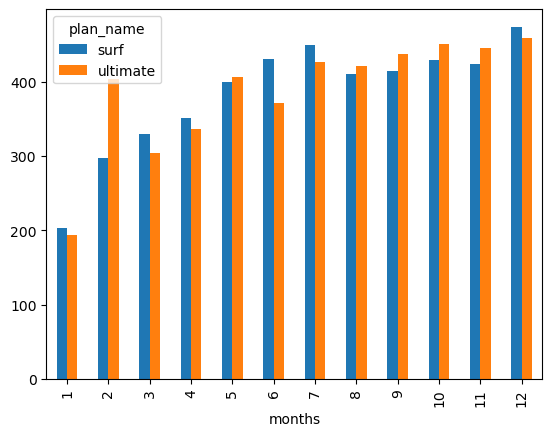

In [87]:
avg_duration.plot(kind='bar')

In [88]:
surf = df_monthly_data.query('plan_name == "surf"')
ultimate = df_monthly_data.query('plan_name == "ultimate"')

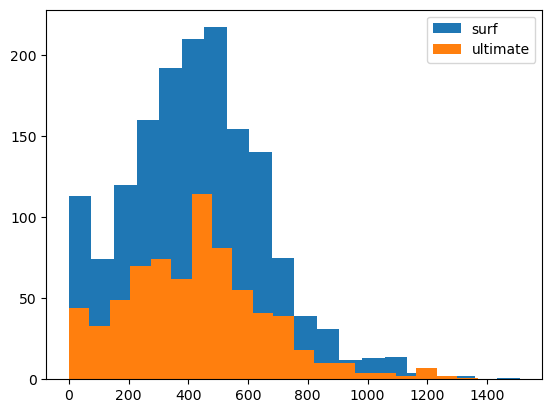

In [89]:
plt.hist(surf['total_durations'], bins=20, label='surf')
plt.hist(ultimate['total_durations'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [90]:
dist_calls = df_monthly_data.pivot_table(index='plan_name', values='total_durations', aggfunc=['mean', 'var'])

In [91]:
dist_calls.columns = ['mean', 'var']

In [92]:
dist_calls

,mean,var
plan_name,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


<AxesSubplot:>

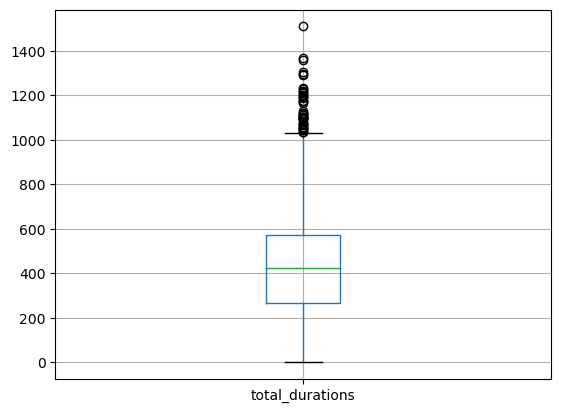

In [93]:
df_monthly_data.boxplot(column='total_durations')

Conclusions from the above information:
- Each user has different behavior for each package.
- Users with the Ultimate package are fewer compared to those with the Surf package. This is because of its higher price.
- The duration of calls in the Surf package is higher compared to the Ultimate package.
- Both packages have users with almost the same average call duration.
- The histograms in these charts show a right-skewed distribution.

## Message

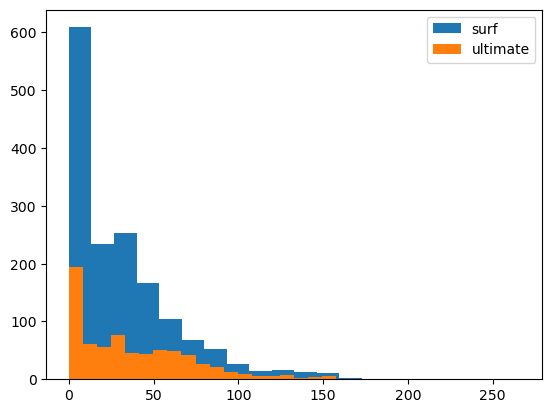

In [94]:
plt.hist(surf['messages_permonth'], bins=20, label='surf')
plt.hist(ultimate['messages_permonth'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [95]:
dist_messages= df_monthly_data.pivot_table(index='plan_name', values='messages_permonth', aggfunc=['mean', 'std','var'])
dist_messages

,mean,std,var
,messages_permonth,messages_permonth,messages_permonth
plan_name,,,
surf,31.159568,33.566717,1126.724522
ultimate,37.551389,34.767179,1208.756744


<AxesSubplot:>

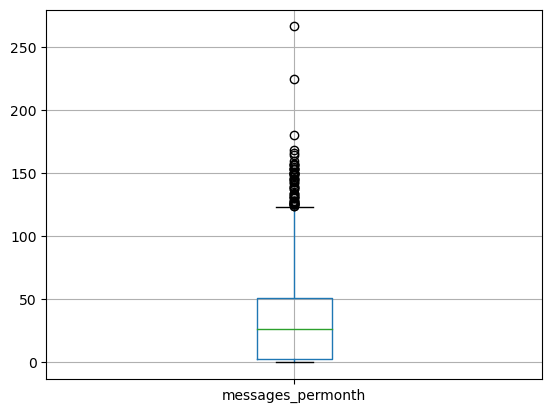

In [96]:
df_monthly_data.boxplot(column='messages_permonth')

Kesimpulan dari informasi di atas:
- Pengguna paket SMS surf lebih banyak dibandingkan dengan paket ultimate.
- Rata-rata SMS yang dikirimkan hampir sama meskipun yang lebih tinggi adalah pengguna paket ultimate.
- Histogram memiliki jenis skewness ke arah ke kanan.

## Internet

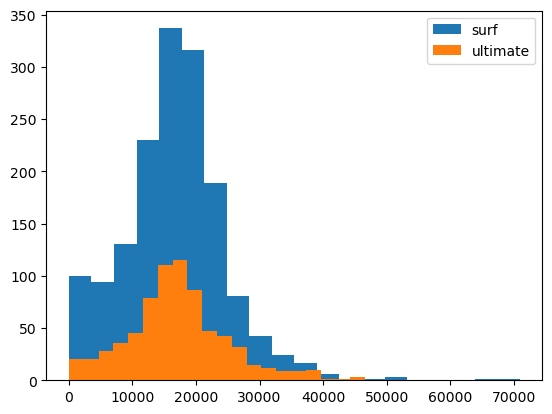

In [97]:
plt.hist(surf['volume_permonth'], bins=20, label='surf')
plt.hist(ultimate['volume_permonth'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [98]:
dist_messages= df_monthly_data.pivot_table(index='plan_name', values='volume_permonth', aggfunc=['mean', 'std','var'])
dist_messages

,mean,std,var
,volume_permonth,volume_permonth,volume_permonth
plan_name,,,
surf,16558.283490,8013.513327,6.421640e+07
ultimate,17214.699694,7851.897435,6.165229e+07


<AxesSubplot:>

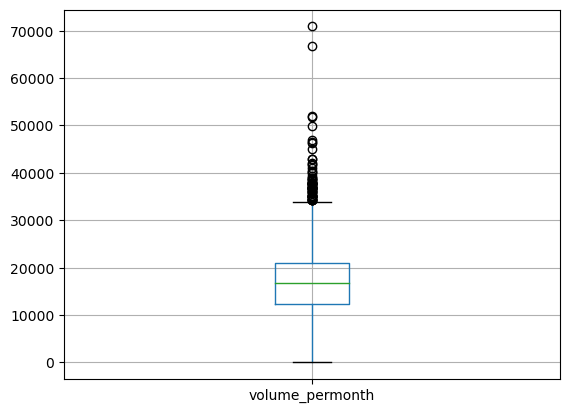

In [99]:
df_monthly_data.boxplot(column='volume_permonth')

Conclusions from the above information:
- Internet package users are almost evenly distributed among the three categories.
- The most common internet package is Surf.
- The histograms show a symmetric distribution, indicating that the average usage is relatively similar among the categories.

## Revenue

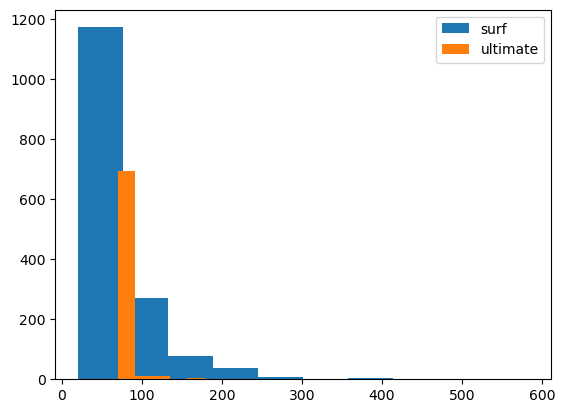

In [100]:
plt.hist(surf['profit'], bins=10, label='surf')
plt.hist(ultimate['profit'], bins=5, label='ultimate')
plt.legend()
plt.show()

In [101]:
desc_profit = df_monthly_data.pivot_table(index='plan_name', values='profit', aggfunc=['mean', 'std','var'])

In [102]:
desc_profit

,mean,std,var
,profit,profit,profit
plan_name,,,
surf,57.672846,53.860388,2900.941343
ultimate,72.116080,10.768848,115.968081


<AxesSubplot:>

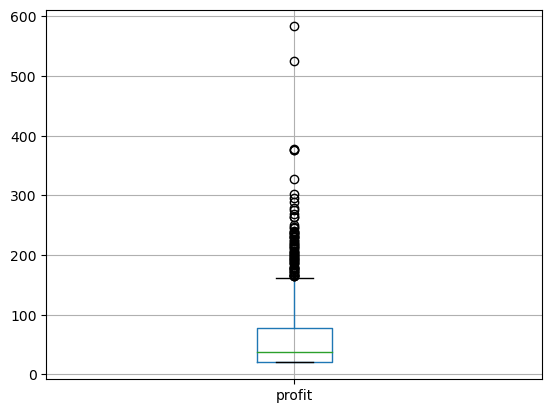

In [103]:
surf.boxplot(column='profit')

<AxesSubplot:>

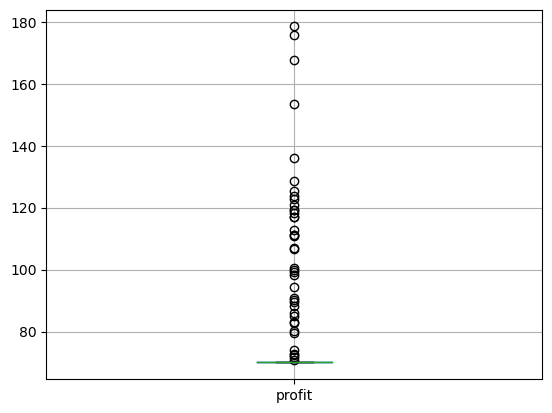

In [104]:
ultimate.boxplot(column='profit')

Conclusions from the above information:
- Profit generated from the Surf package is higher than that from the Ultimate package. This is likely because the Surf package is priced lower than the Ultimate package, attracting more users.
- Despite the higher average profit per user for the Ultimate package, the Surf package is used more frequently, resulting in higher overall profit.
- The profit distribution for the Surf package is right-skewed, indicating that the Surf package may be more profitable than the Ultimate package on average.

# Hypothesis Testing

- $H_0$: The average revenue from using the Surf and Ultimate phone packages is the same.
- $H_1$: The average revenue from using the Surf and Ultimate phone packages is different.

Since we are testing the hypothesis that the revenue from Surf is either equal to or not equal to the revenue from Ultimate, we use a two-tailed test.

In [105]:
mean = surf['profit'].mean()
round(mean, 2)

57.67

In [106]:
ultimate['profit'].mean()

72.11607964409721

In [107]:
alpha = 0.05
results = st.stats.ttest_ind(surf['profit'], ultimate['profit'], equal_var=False)
print("p-value :", results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We accept the null hypothesis")

p-value : 8.530525302625684e-24
We reject the null hypothesis.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3964\742901652.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(surf['profit'], ultimate['profit'], equal_var=False)


- $H_0$: The average revenue from users in the NY-NJ area is the same as the average revenue from users in other areas.
- $H_1$: The average revenue from users in the NY-NJ area is different from the average revenue from users in other areas.

Similar to the revenue package hypothesis, this hypothesis will be tested using a two-tailed test.

In [108]:
mean_ny_nj = df_monthly_data.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
mean_other = df_monthly_data.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [109]:
alpha = 0.05
results_city = st.stats.ttest_ind(mean_ny_nj['profit'], mean_other['profit'], equal_var=False)
print("p-value :", results_city.pvalue)

if (results_city.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We accept the null hypothesis.")

p-value : 0.020128295172528086
We reject the null hypothesis.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3964\1325901233.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results_city = st.stats.ttest_ind(mean_ny_nj['profit'], mean_other['profit'], equal_var=False)


# Conclusion

Before conducting the analysis, we need to perform preprocessing steps, including:

- Changing the data type of columns containing dates and float data to integer (as needed).
- Adding columns (if necessary), such as a month column, total calls, total SMS, and total data usage.
- Once the data is ready, the next step is to combine the total usage based on the user.
- After combining the data, the next step is to add profit or revenue obtained from each user. This is what we will analyze.

Analysis of the graphs:
- The graph used for this analysis is a bar chart to examine telephone usage by each user. It turns out that out of 12 months, the surf-type telephone package is used more frequently for 10 months.
- The next graph is a histogram, looking at the overall usage (telephone, SMS, internet), surf data has more users. However, for the average usage, the values are almost the same.
- For the revenue graph, starting from the surf package histogram, it has more users due to its lower price.
- In the boxplot graph, the distribution value of the surf package is more skewed to the right. This means that the surf package can be more profitable than the ultimate package.

Hypothesis Testing Analysis:
- Moving on to hypothesis testing. In this hypothesis testing, we will use a two-tailed test because both hypotheses aim to prove whether the income between the two packages and between NY-NJ and other cities are the same or not.
- The alpha value to be taken is 5%, and for the sample, we will take the average income from the package and the NY-NJ city.
- The result: The average income from using the surf phone package and the ultimate phone package is different, and the income between NY-NJ city and other cities is also different.

Hasil dari pengujian ini adalah paket yang paling menguntungkan adalah paket surf berdasarkan banyaknya pengguna dan nilai distribusi pada data meskipun nilai rata-rata pada paket ultimate lebih tinggi.